In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams11.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,0,MLP
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,0,MLP
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,0,MLP
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,0,MLP
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,0,MLP


In [3]:
len(df)

18476

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18476 entries, 0 to 18475
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18476 non-null  int64  
 1   N_Person           18476 non-null  int64  
 2   Xcenter            18476 non-null  float64
 3   Ycenter            18476 non-null  float64
 4   PerXmin            18476 non-null  float64
 5   PerYmin            18476 non-null  float64
 6   PerXmax            18476 non-null  float64
 7   PerYmax            18476 non-null  float64
 8   N_Handgun          18476 non-null  int64  
 9   HgXcenter          18476 non-null  float64
 10  HgYcenter          18476 non-null  float64
 11  HgXmin             18476 non-null  float64
 12  HgYmin             18476 non-null  float64
 13  HgXmax             18476 non-null  float64
 14  HgYmax             18476 non-null  float64
 15  Intersection       18476 non-null  object 
 16  Included_Center    184

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14236
Ycenter              14217
PerXmin              14244
PerYmin              14241
PerXmax              14244
PerYmax              14221
N_Handgun                5
HgXcenter             7289
HgYcenter             7287
HgXmin                7291
HgYmin                7291
HgXmax                7291
HgYmax                7290
Intersection             9
Included_Center          2
Intersection_Area     8446
Hg_Area               7291
Distance             18476
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

0    15996
1     2480
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,MLP,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,MLP,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,MLP,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,MLP,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,MLP,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18476 entries, 0 to 18475
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18476 non-null  int64  
 1   N_Person                      18476 non-null  int64  
 2   Xcenter                       18476 non-null  float64
 3   Ycenter                       18476 non-null  float64
 4   PerXmin                       18476 non-null  float64
 5   PerYmin                       18476 non-null  float64
 6   PerXmax                       18476 non-null  float64
 7   PerYmax                       18476 non-null  float64
 8   N_Handgun                     18476 non-null  int64  
 9   HgXcenter                     18476 non-null  float64
 10  HgYcenter                     18476 non-null  float64
 11  HgXmin                        18476 non-null  float64
 12  HgYmin                        18476 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{0: 'MLP', 1: 'LR'}


In [10]:
print(df2['Ground_Truth'].value_counts())

0    15996
1     2480
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18476 entries, 0 to 18475
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18476 non-null  int64  
 1   N_Person                      18476 non-null  int64  
 2   Xcenter                       18476 non-null  float64
 3   Ycenter                       18476 non-null  float64
 4   PerXmin                       18476 non-null  float64
 5   PerYmin                       18476 non-null  float64
 6   PerXmax                       18476 non-null  float64
 7   PerYmax                       18476 non-null  float64
 8   N_Handgun                     18476 non-null  int64  
 9   HgXcenter                     18476 non-null  float64
 10  HgYcenter                     18476 non-null  float64
 11  HgXmin                        18476 non-null  float64
 12  HgYmin                        18476 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14780, 28) (14780,)
(3696, 28) (3696,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9108028867839423
mean_test =  0.910148849797023


,fit_time,score_time,test_score,train_score
0,0.059842,0.003783,0.903248,0.908435
1,0.059839,0.001995,0.915426,0.911216
2,0.059840,0.002992,0.914750,0.910690
3,0.057845,0.002992,0.905954,0.910389
4,0.060837,0.003990,0.905954,0.910765
5,0.058842,0.002993,0.913396,0.911667
6,0.060838,0.002991,0.917456,0.911292
7,0.060836,0.002992,0.907984,0.912419
8,0.059840,0.001995,0.909337,0.911517
9,0.058843,0.002992,0.907984,0.909638


In [15]:
# save the model to disk
filename = 'rfc_model_intersection_0.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9374981205833709
mean_test =  0.934573748308525


,fit_time,score_time,test_score,train_score
0,0.096713,0.002991,0.933694,0.940535
1,0.097739,0.002993,0.941813,0.940235
2,0.095741,0.001995,0.942490,0.941061
3,0.093748,0.002992,0.932341,0.940310
4,0.093749,0.001995,0.919486,0.932642
5,0.095777,0.002987,0.931664,0.933920
6,0.097737,0.003967,0.937077,0.931514
7,0.098739,0.002989,0.931664,0.933920
8,0.098735,0.002990,0.936401,0.938130
9,0.097747,0.002985,0.939107,0.942715


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 304,  193],
        [  17, 3182]],

       [[3182,   17],
        [ 193,  304]]], dtype=int64)

                         feature  importance       std
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
27         Intersection_Up_right    0.000020  0.000061
24  Intersection_No_intersection    0.000098  0.000293
15               Included_Center    0.001696  0.005087
19      Intersection_Center_left    0.005031  0.008953
1                       N_Person    0.011694  0.025473
6                        PerXmax    0.012905  0.037500
16             Intersection_Area    0.019252  0.042262
13                        HgXmax    0.021888  0.034276
17                       Hg_Area    0.025143  0.040311
20     Intersection_Center_right    0.025243  0.045119
9                      HgXcenter    0.027929  0.038642
11                        HgXmin    0.027986  0.041150
4         

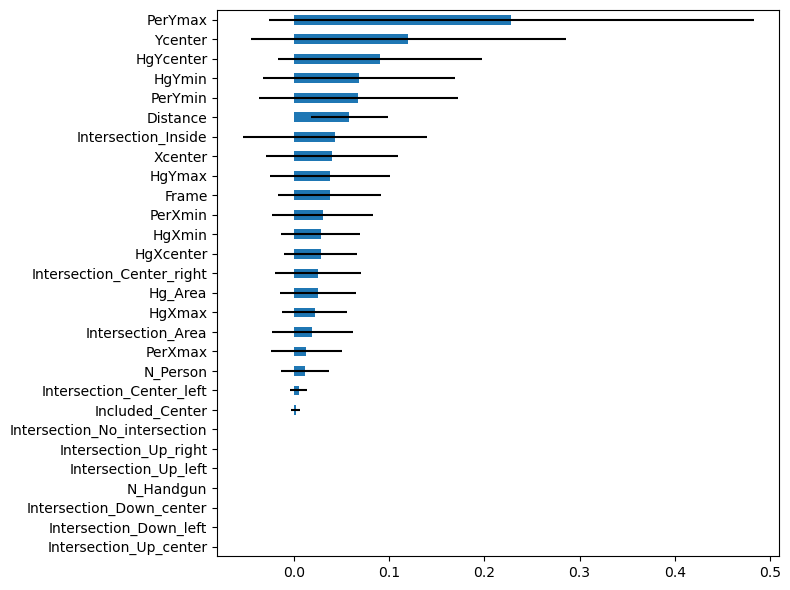

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3199
           1       0.95      0.61      0.74       497

    accuracy                           0.94      3696
   macro avg       0.94      0.80      0.86      3696
weighted avg       0.94      0.94      0.94      3696



In [17]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18476 entries, 0 to 18475
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18476 non-null  int64  
 1   N_Person                      18476 non-null  int64  
 2   Xcenter                       18476 non-null  float64
 3   Ycenter                       18476 non-null  float64
 4   PerXmin                       18476 non-null  float64
 5   PerYmin                       18476 non-null  float64
 6   PerXmax                       18476 non-null  float64
 7   PerYmax                       18476 non-null  float64
 8   N_Handgun                     18476 non-null  int64  
 9   HgXcenter                     18476 non-null  float64
 10  HgYcenter                     18476 non-null  float64
 11  HgXmin                        18476 non-null  float64
 12  HgYmin                        18476 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86326163, -1.00667267,  0.38734516, -1.06125626,  0.40824584,
        -0.80335781,  0.35078879, -1.43289812, -0.4972173 ,  0.64976535,
        -1.26103311,  0.70246124, -1.17972205,  0.59565633, -1.33764962,
         1.17826753, -0.04971489, -0.63083215, -0.69700524,  2.66724302,
        -0.28344573, -0.0164528 , -0.01040482, -0.53755307, -1.0857134 ,
        -0.11970317, -0.0612256 , -0.13895783],
       [-1.86109019, -1.00667267,  0.38705959, -1.06066535,  0.40726421,
        -0.80166812,  0.35123417, -1.43565248, -0.4972173 ,  0.64816932,
        -1.26188784,  0.69945778, -1.18037372,  0.59545525, -1.33870934,
         1.17826753, -0.04729554, -0.62493541, -0.6955775 ,  2.66724302,
        -0.28344573, -0.0164528 , -0.01040482, -0.53755307, -1.0857134 ,
        -0.11970317, -0.0612256 , -0.13895783],
       [-1.85891876, -1.00667267,  0.38767976, -1.06282121,  0.40873242,
        -0.80572405,  0.3509533 , -1.4316327 , -0.4972173 ,  0.64799063,
        -1.26330297,  0.6993

In [21]:
print(scaler.mean_)

[8.58077614e+02 8.80006495e-01 3.92791498e+02 3.82533416e+02
 3.05569658e+02 2.46252891e+02 4.80013338e+02 5.18813941e+02
 2.98820091e-01 3.10563874e+02 3.12559376e+02 2.87194013e+02
 2.93020701e+02 3.33933735e+02 3.32098050e+02 4.18705347e-01
 9.27689235e+02 2.02464734e+03 2.31970764e+02 1.23240961e-01
 7.43667460e-02 2.70621347e-04 1.08248539e-04 2.24182724e-01
 5.41026196e-01 1.41264343e-02 3.73457458e-03 1.89434943e-02]


In [22]:
print(scaler.scale_)

[4.60524491e+02 8.74173423e-01 2.12234363e+02 6.87397305e+01
 2.19984096e+02 1.11843273e+02 2.12687277e+02 3.91170674e+01
 6.00984897e-01 1.52852279e+02 9.71516257e+01 1.52137021e+02
 9.90954815e+01 1.54058414e+02 9.57782278e+01 4.93346916e-01
 1.66477361e+03 1.81211294e+03 1.37516715e+02 3.28713594e-01
 2.62366791e-01 1.64483467e-02 1.04036927e-02 4.17042959e-01
 4.98314009e-01 1.18012195e-01 6.09969469e-02 1.36325487e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13857, 28)

In [25]:
y_train.value_counts()

0    11997
1     1860
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4619, 28)

In [27]:
y_test.value_counts()

0    3999
1     620
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[2.43301468e-04, 9.99756699e-01],
       [9.99999826e-01, 1.74015263e-07],
       [3.52696624e-04, 9.99647303e-01],
       ...,
       [9.98894438e-01, 1.10556160e-03],
       [9.99999986e-01, 1.43071196e-08],
       [6.28237085e-04, 9.99371763e-01]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 591,   29],
        [  53, 3946]],

       [[3946,   53],
        [  29,  591]]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3999
           1       0.92      0.95      0.94       620

    accuracy                           0.98      4619
   macro avg       0.96      0.97      0.96      4619
weighted avg       0.98      0.98      0.98      4619



In [32]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9902576315219744
Score test =  0.9822472396622646


In [31]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  1.0
Score test =  0.9626700411262259


In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))